# 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',100)

# 데이터 로드

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,0,3059,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,0,2978,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0,1,0,0,1,0,572,2,19,1117,0,0,0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,0,17,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0,0,0,0,2,0,328,0,17,1334,0,0,1,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,0,1960,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0,4,1,0,0,0,906,1,44,21774,2,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,0,71,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0,0,0,0,2,0,309,0,217,18470,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [4]:
test.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


# EDA

In [5]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


In [6]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(train):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(train[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(train[train[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(train[train[item].isnull() == True])/len(train[item])*100,2))
    
for item in dataFeatures:
    minValue.append(train[item].min())

for item in dataFeatures:
    maxValue.append(train[item].max())

for item in dataFeatures:
    unique.append(train[item].nunique())

for item in dataFeatures:
    uniqueSample.append(train[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [8]:
# Y_LABEL을 int형에서 object형으로 변환
train = train.astype({'Y_LABEL' : 'object'})

In [9]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test[test[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test[test[item].isnull() == True])/len(test[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test[item].min())

for item in dataFeatures:
    maxValue.append(test[item].max())

for item in dataFeatures:
    unique.append(test[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

## 결측치 확인
- Train셋의 Feature 중 Test셋에 존재하지 않는 Feature는 대부분 결측치
- 향후 전처리 요망

In [11]:
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [12]:
test.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

## 통계량 확인

In [13]:
train.describe()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,12701.000000,14095.000000,14095.000000,14095.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,14095.000000,3890.000000,14095.000000,11796.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,3890.000000,14095.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000
mean,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,0.015589,0.028166,3.299468,34.560624,15.242159,7.138303,0.532905,12.495373,20.284319,8.783239,178.169280,0.185347,0.033650,3.611224,0.242568,33.477545,2.787939,23.992409,3.946222,0.730117,909.662788,1.659383,415.159631,12029.318624,0.476978,35.058248,0.909826,0.609254,0.707911,0.173575,0.417098,6.185233,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.050656,13.576230,109.355815,588.646825
std,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,0.209407,0.314249,28.595510,128.958953,17.591679,1.860775,0.621937,3.439535,3.234296,1.339355,533.208976,0.899253,0.809162,15.630404,2.190055,116.526762,11.131836,59.833922,17.914325,3.806716,564.388965,10.319130,1528.191012,9325.610196,2.729936,195.329029,3.604276,0.652382,6.897579,0.878892,1.626333,36.639482,97.459625,184.332678,685.053457,15474.146283,40145.311444,0.475438,1.073718,49.612379,531.743393
min,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000
25%,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,1.000000,11.000000,6.000000,0.000000,10.000000,18.000000,8.100000,14.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,448.000000,0.000000,12.000000,4440.500000,0.000000,3.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800000,37.000000
50%,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,0.000000,0.000000,1.000000,4.000000,13.000000,7.000000,0.000000,12.000000,20.000000,8.700000,41.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,1.000000,2.000000,0.000000,916.000000,0.000000,29.000000,8034.000000,0.000000,6.000000,0.000000,0.400000,0.000000,0.000000,0.000000,1.000000,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300000,520.000000
75%,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,0.000000,0.000000,3.000000,17.000000,15.000000,8.000000,1.000000,14.750000,22.000000,9.600000,139.000000,0.000000,0.000000,3.000000,0.000000,13.000000,2.000000,7.000000,4.000000,0.000000,1101.000000,2.000000,181.000000,19750.000000,0.000000,12.000000,1.000000,0.800000,0.000000,0.000000,0.000000,3.000000,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.200000,1119.000000
max,294451.000000,2022.000000,368.000000,9650.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,6609

In [14]:
test.describe()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
count,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000
mean,3199.140871,2013.656514,392.669922,0.026817,0.030790,3.155438,37.397285,198.615295,0.024599,3.127462,25.042212,0.883463,475.091210,0.797219,0.044529,110.495135,581.186393
std,4834.849930,3.976759,563.705290,0.179981,0.268141,21.120731,153.922102,690.985612,0.335461,11.315785,62.245538,5.708857,1812.652841,7.366433,0.359595,45.381679,530.799040
min,1000.000000,2007.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,1.000000
25%,1667.000000,2010.000000,200.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,73.000000,38.000000
50%,2271.000000,2014.000000,200.000000,0.000000,0.000000,1.000000,4.000000,41.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,112.100000,489.000000
75%,3842.000000,2017.000000,417.000000,0.000000,0.000000,2.000000,17.000000,143.000000,0.000000,2.000000,8.000000,0.000000,173.000000,0.000000,0.000000,138.200000,1115.000000
max,239570.000000,2022.000000,9650.000000,2.000000,13.000000,1415.000000,4113.000000,30407.000000,15.200000,472.000000,765.000000,155.000000,48976.000000,280.000000,13.000000,388.400000,1932.000000


## Anomaly 비율 시각화

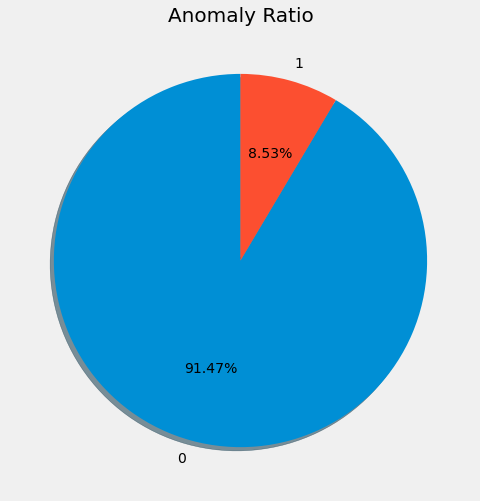

In [15]:
plt.subplots(figsize = (8,8))
plt.pie(train['Y_LABEL'].value_counts(), labels = train['Y_LABEL'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Anomaly Ratio', size=20)
plt.show()

## 정상치와 이상치 Feature 시각화
- Test Feature는 test셋에 존재하는 feature

In [16]:
# 이상치 유무에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['Y_LABEL']==0]
train_1 = train[train['Y_LABEL']==1]

In [81]:
len(train_0)

12892

In [82]:
len(train_1)

1203

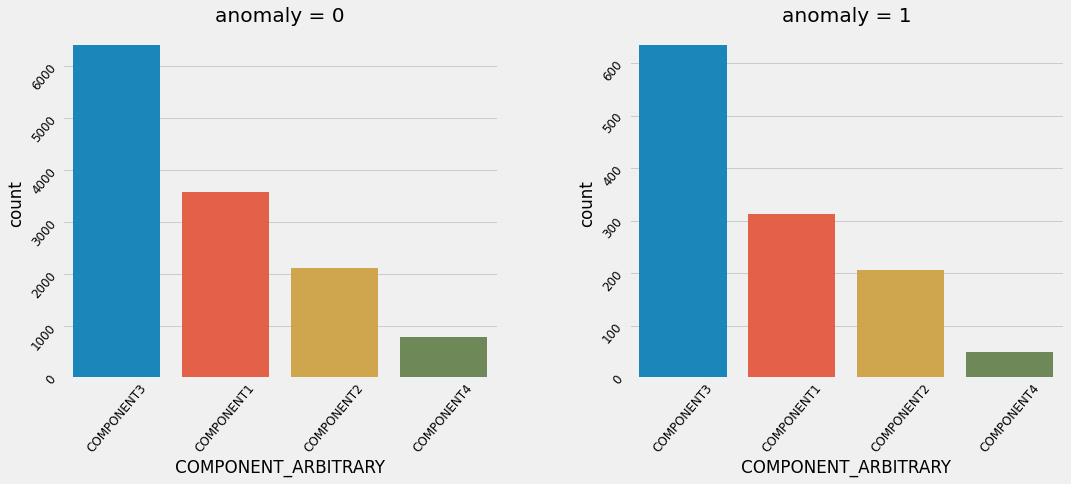

In [17]:
# 'COMPONENT_ARBITRARY') #Test Feature
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x = 'COMPONENT_ARBITRARY',
                data = train_0,
                ax = ax[0],
                order = train_0['COMPONENT_ARBITRARY'].value_counts().index)
ax[0].tick_params(labelsize=12)
ax[0].set_title('anomaly = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)


sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = train_1,
              ax = ax[1],
              order = train_1['COMPONENT_ARBITRARY'].value_counts().index)
ax[1].tick_params(labelsize=12)
ax[1].set_title('anomaly = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [18]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('anomaly = 0')
  axes[0].set_ylabel('count')
  axes[0].set_xlim(None,train[column].max())
    
  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('anomaly = 1')
  axes[1].set_ylabel('count')
  axes[1].set_xlim(None,train[column].max())


  plt.subplots_adjust(wspace=0.3, hspace=0.3)

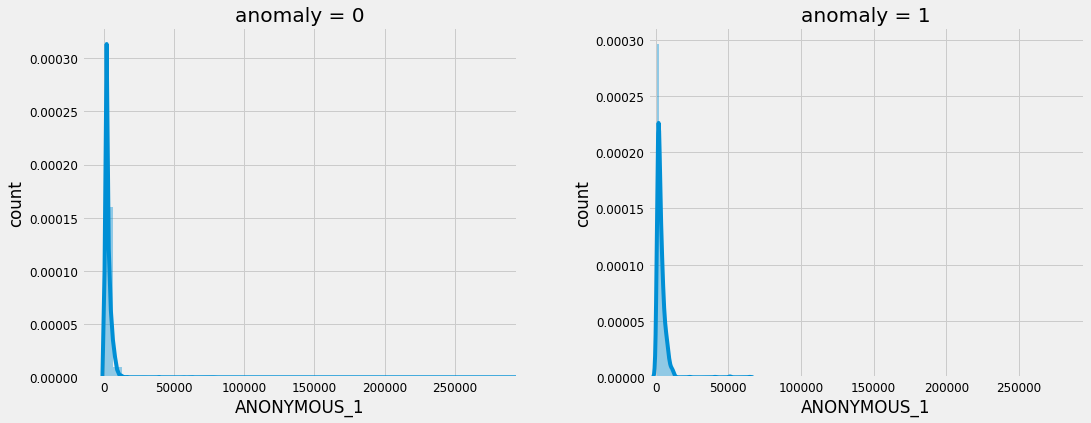

In [19]:
num_plot('ANONYMOUS_1') #Test Feature

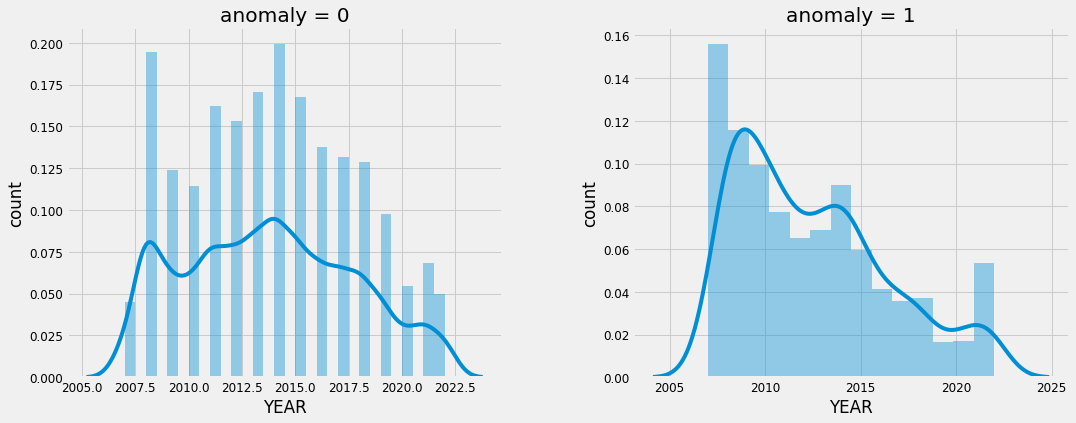

In [20]:
# YEAR Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.distplot(train_0['YEAR'],
                ax = axes[0])
axes[0].tick_params(labelsize=12)
axes[0].set_title('anomaly = 0')
axes[0].set_ylabel('count')

    
sns.distplot(train_1['YEAR'],
                ax = axes[1])
axes[1].tick_params(labelsize=12)
axes[1].set_title('anomaly = 1')
axes[1].set_ylabel('count')


plt.subplots_adjust(wspace=0.3, hspace=0.3)

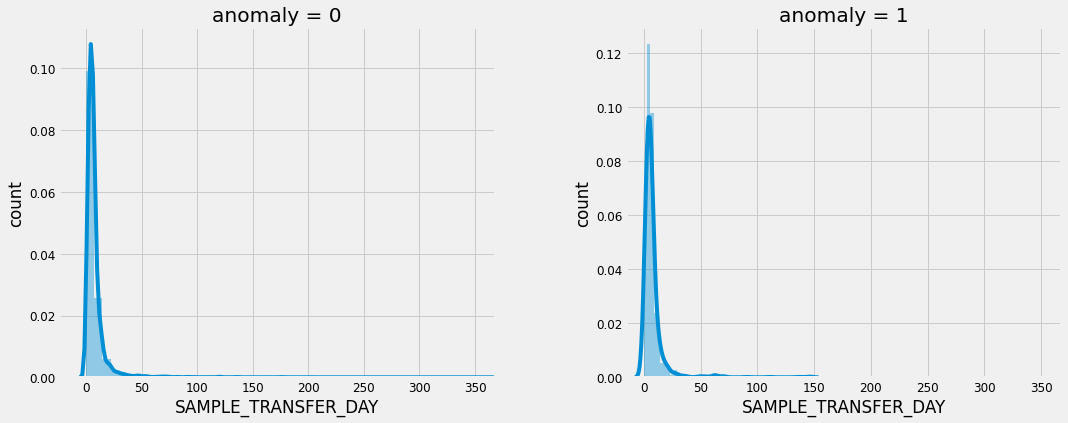

In [21]:
num_plot('SAMPLE_TRANSFER_DAY')

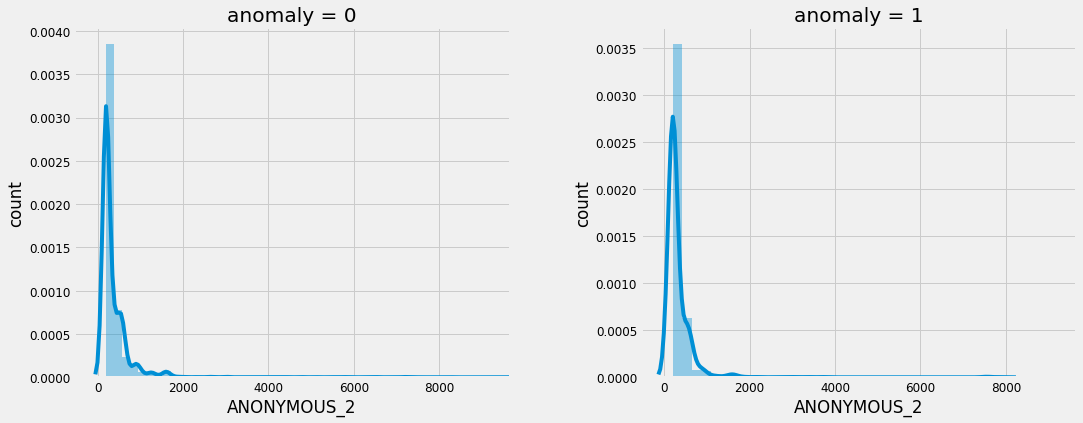

In [22]:
num_plot('ANONYMOUS_2') #Test Feature

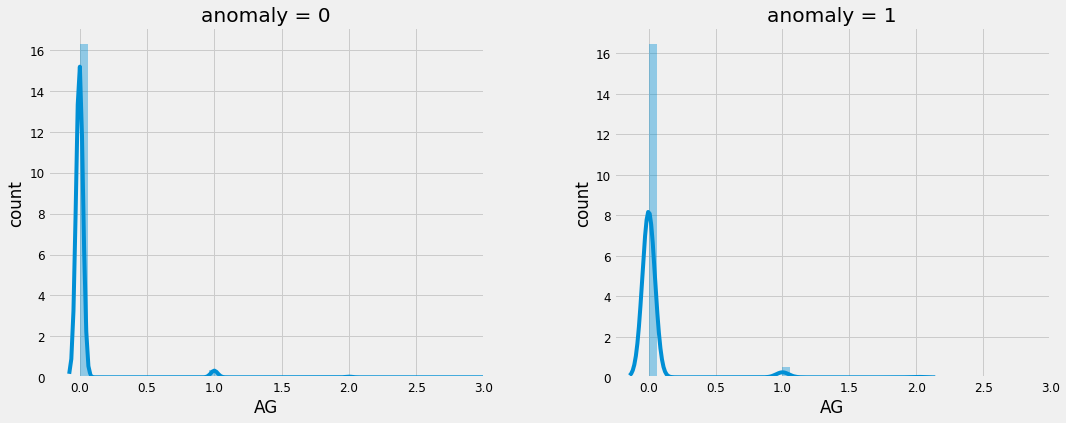

In [23]:
num_plot('AG') #Test Feature

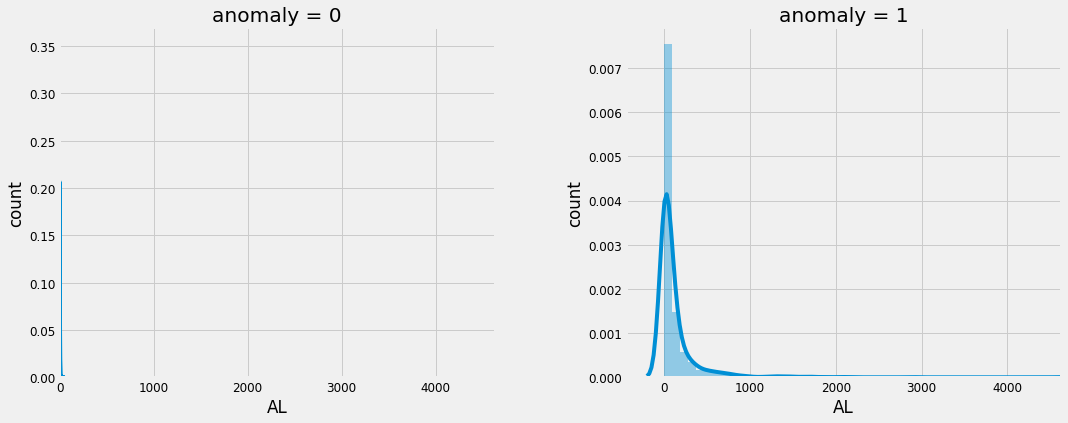

In [24]:
num_plot('AL')

In [79]:
train['AL'].describe()

count    14095.000000
mean        12.707698
std         86.968000
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4630.000000
Name: AL, dtype: float64

In [80]:
len(train['AL'])

14095

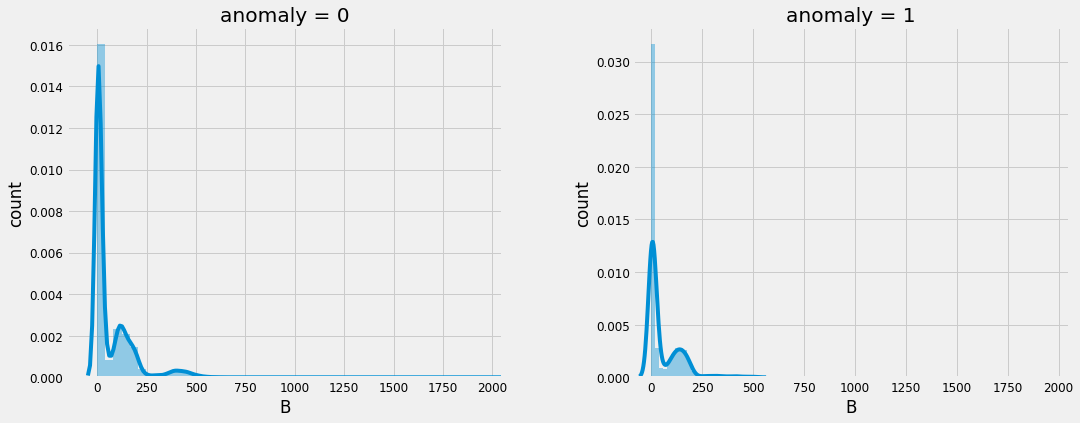

In [25]:
num_plot('B')

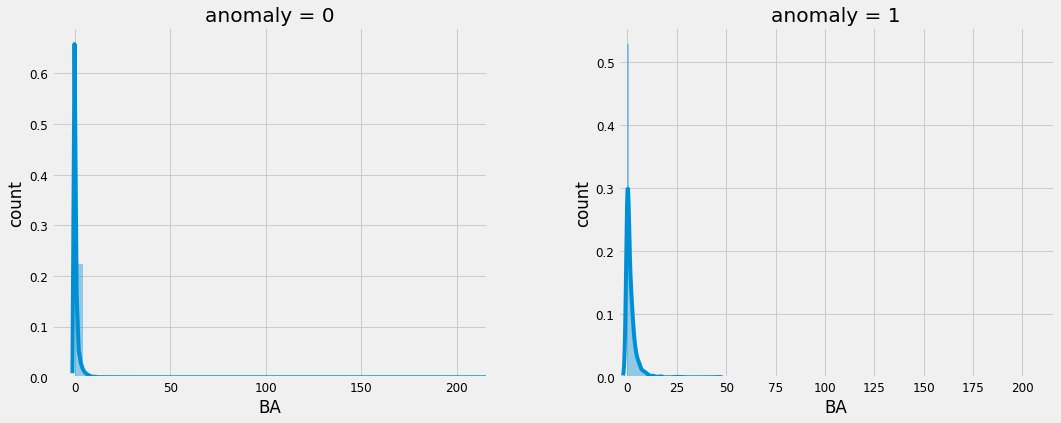

In [26]:
num_plot('BA')

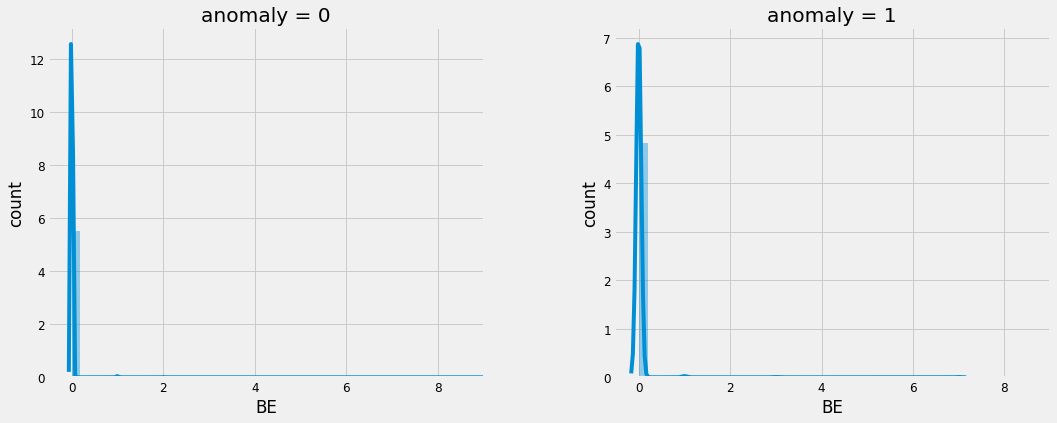

In [27]:
num_plot('BE')

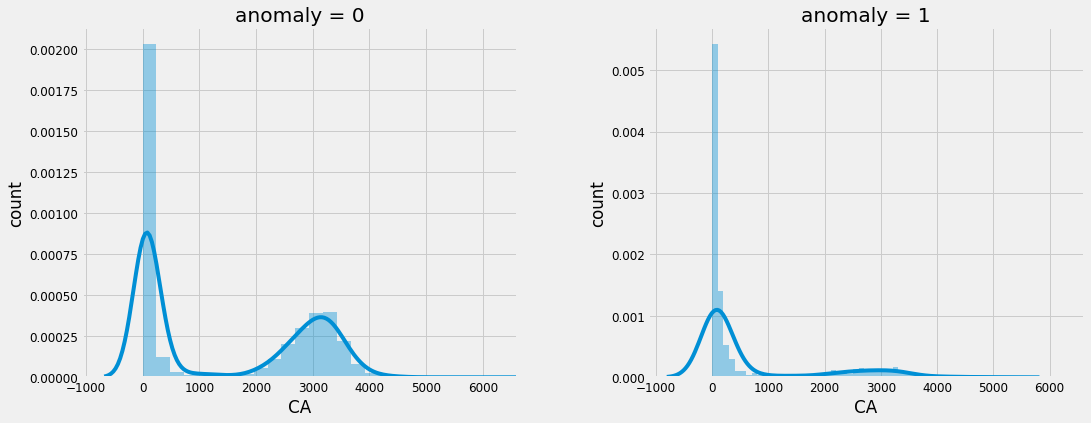

In [28]:
num_plot('CA')

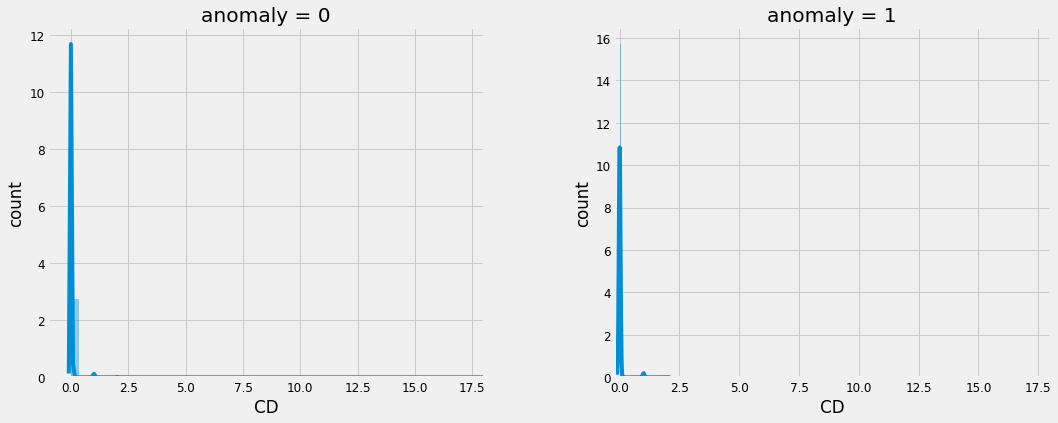

In [29]:
num_plot('CD')

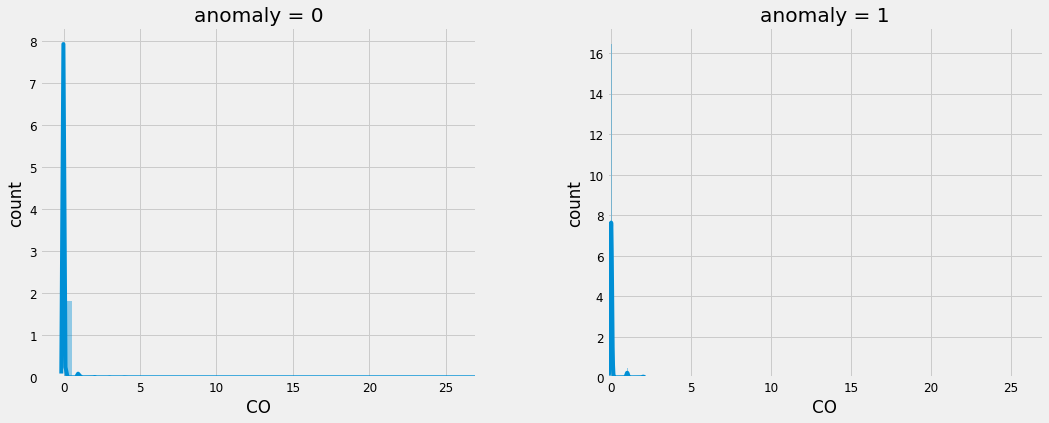

In [30]:
num_plot('CO') #Test Feature

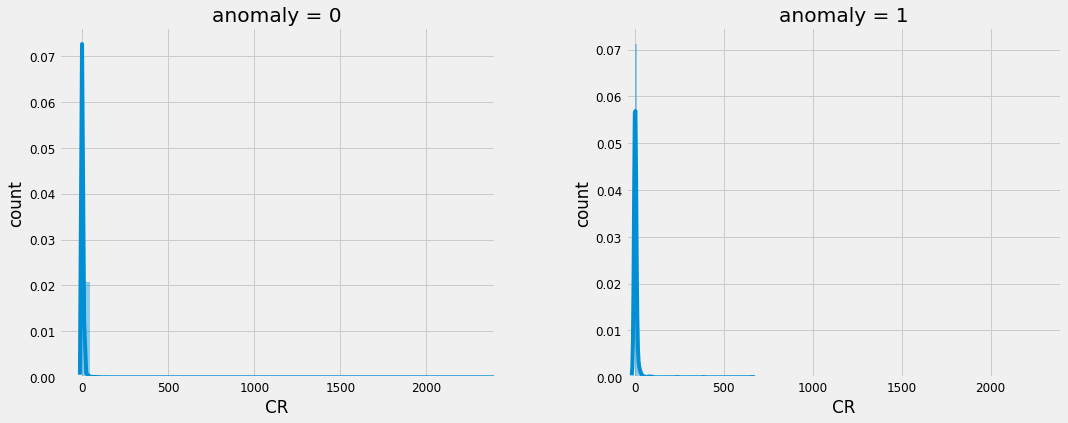

In [31]:
num_plot('CR') #Test Feature

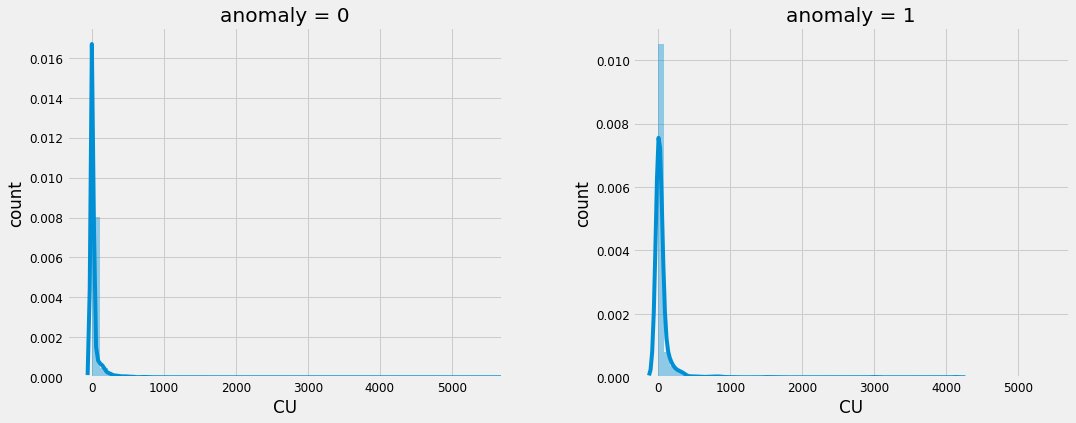

In [32]:
num_plot('CU') #Test Feature

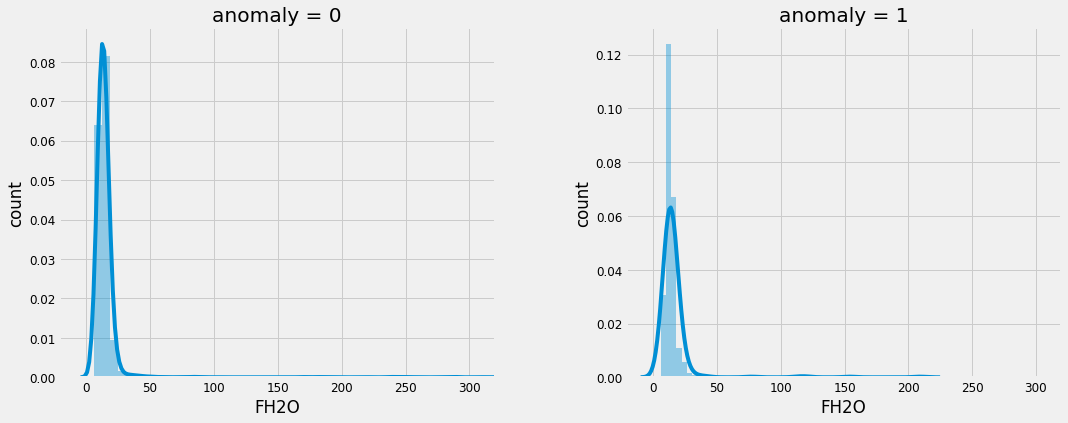

In [33]:
num_plot('FH2O')

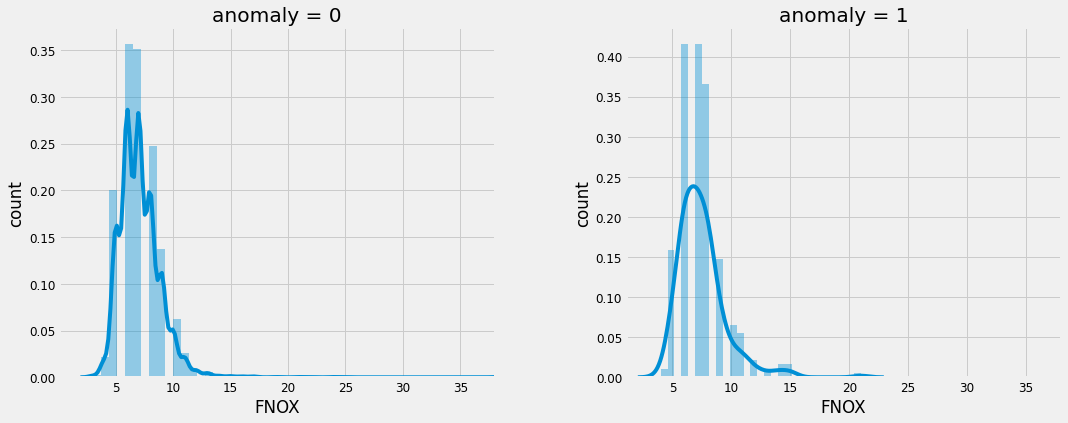

In [34]:
num_plot('FNOX')

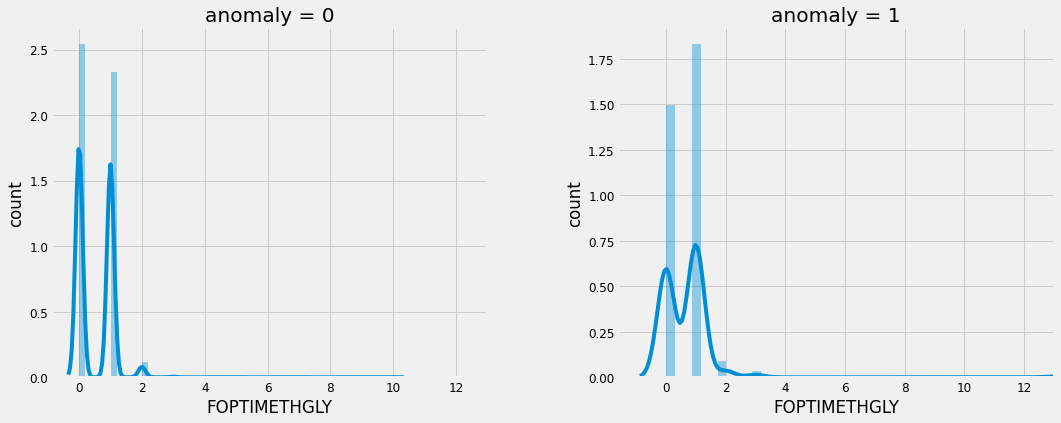

In [35]:
num_plot('FOPTIMETHGLY')

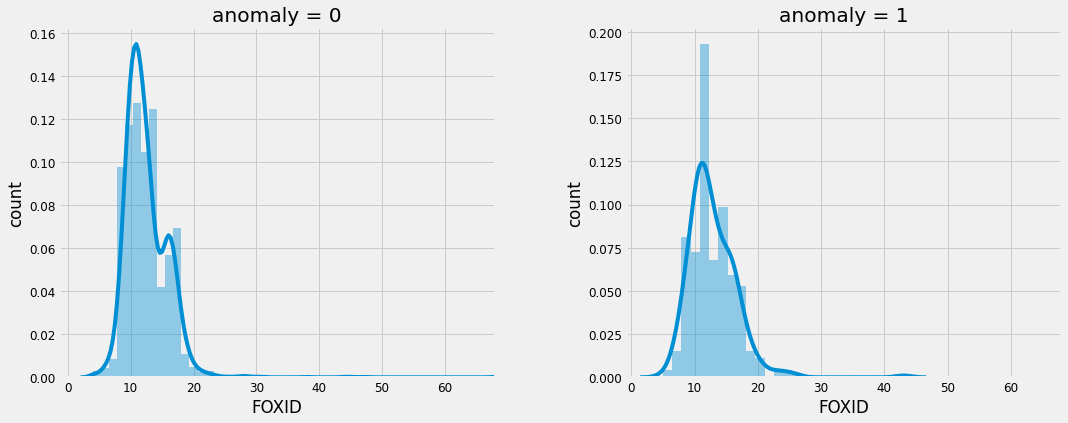

In [36]:
num_plot('FOXID')

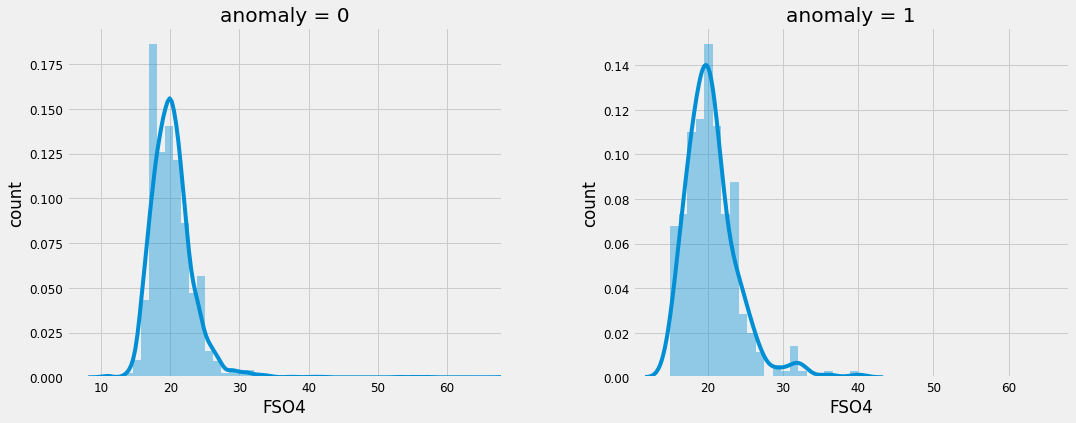

In [37]:
num_plot('FSO4')

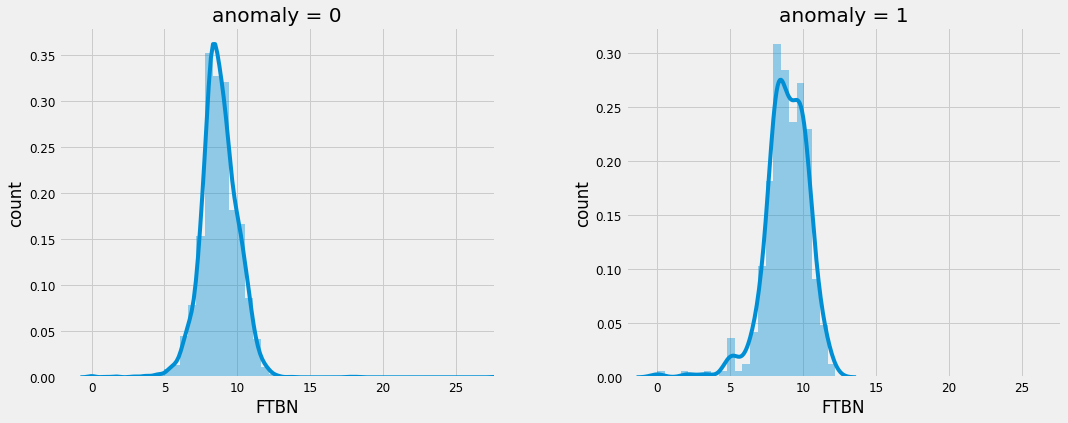

In [38]:
num_plot('FTBN')

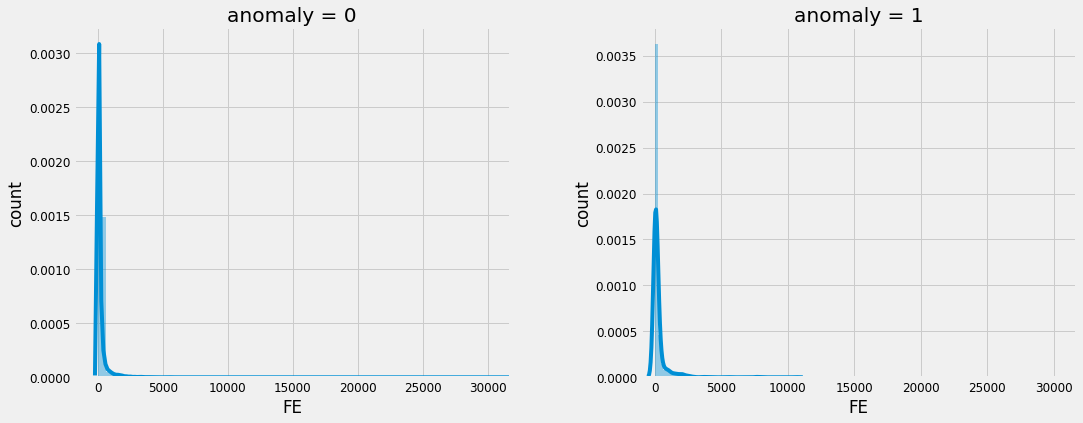

In [39]:
num_plot('FE') #Test Feature

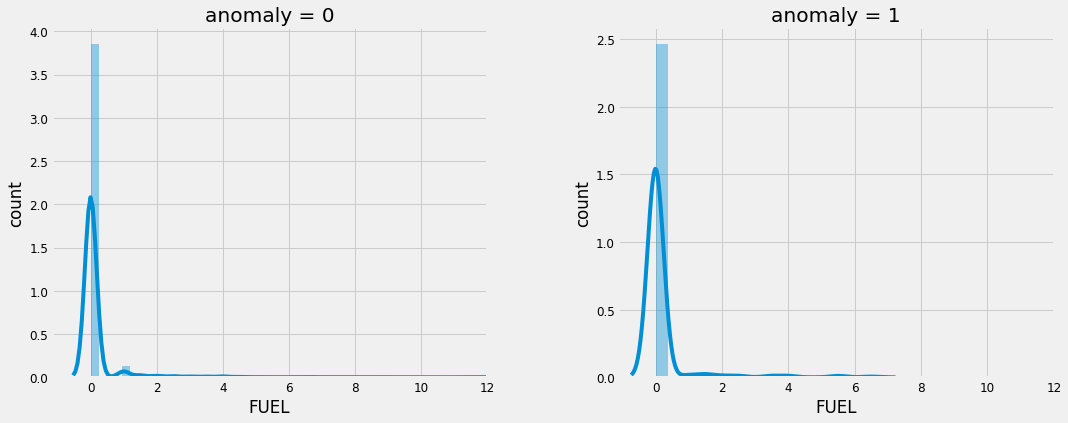

In [40]:
num_plot('FUEL')

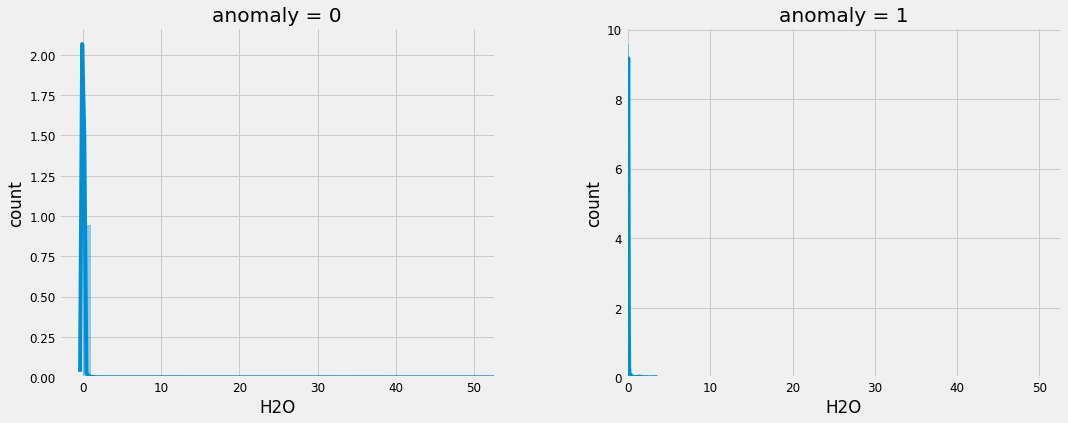

In [41]:
num_plot('H2O') #Test Feature

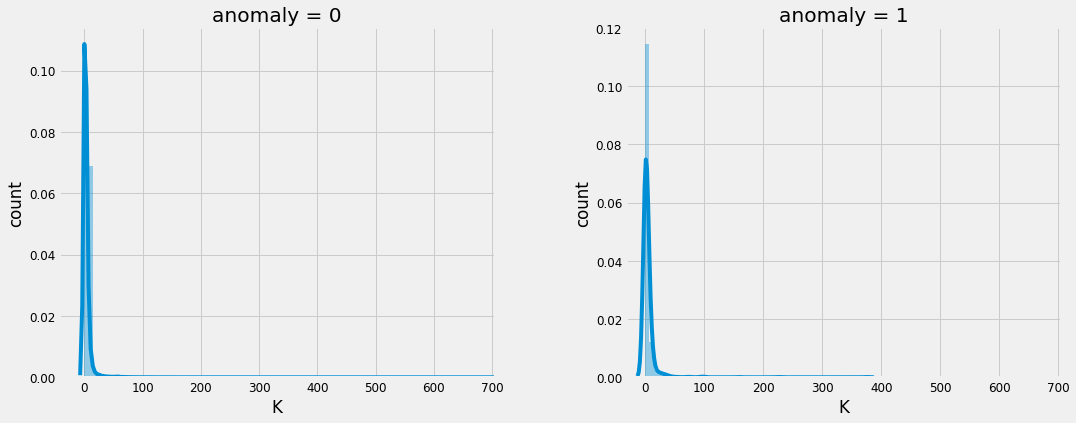

In [42]:
num_plot('K')

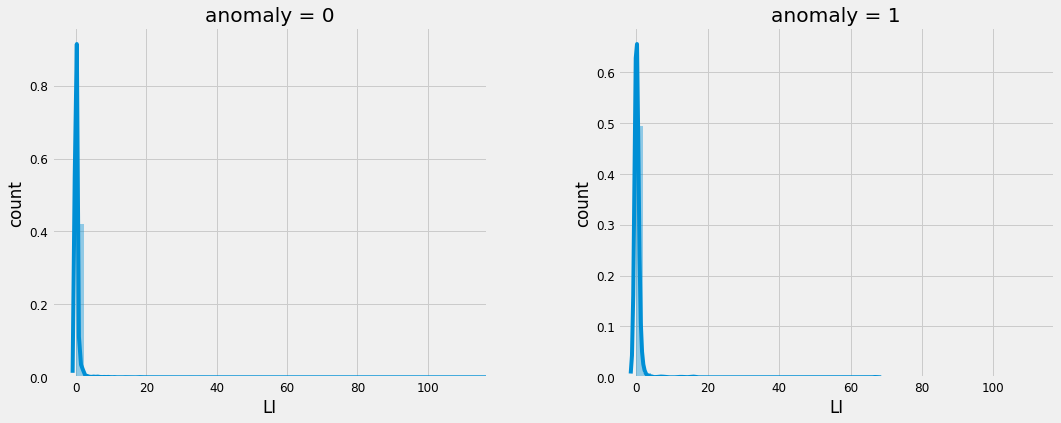

In [43]:
num_plot('LI')

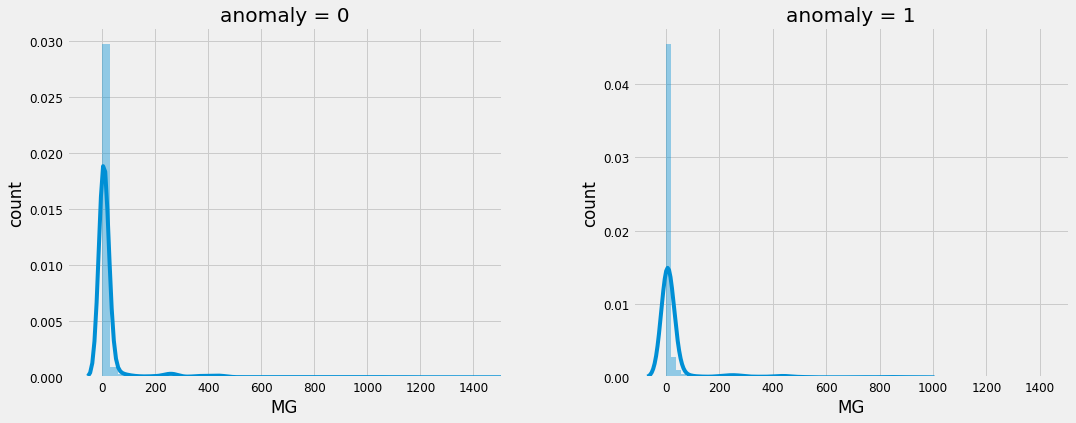

In [44]:
num_plot('MG')

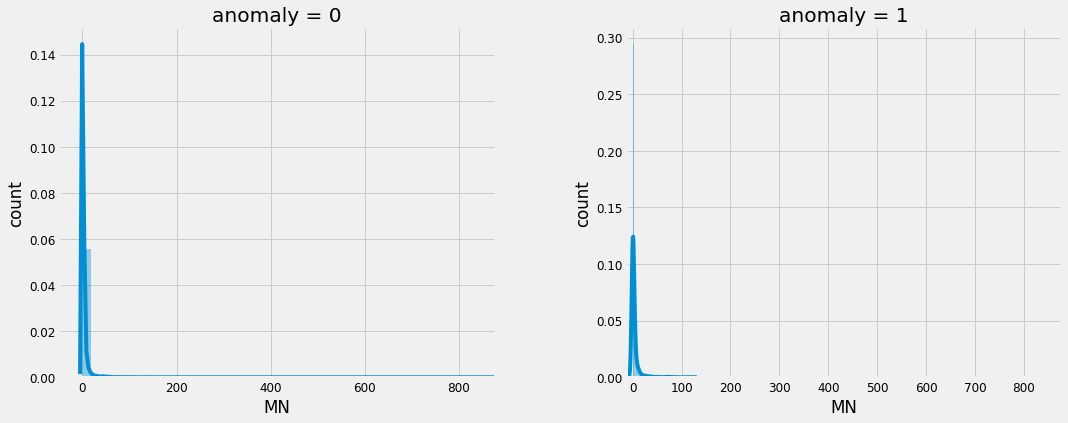

In [45]:
num_plot('MN') #Test Feature

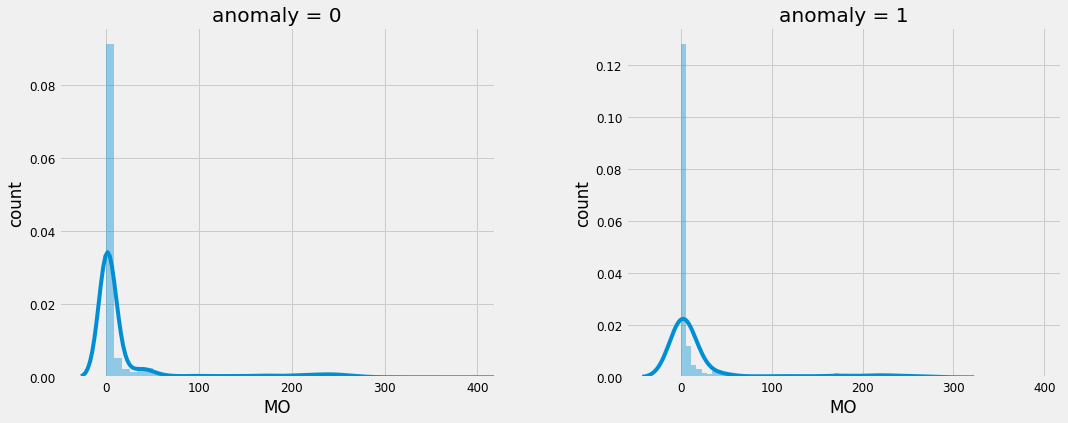

In [46]:
num_plot('MO') #Test Feature

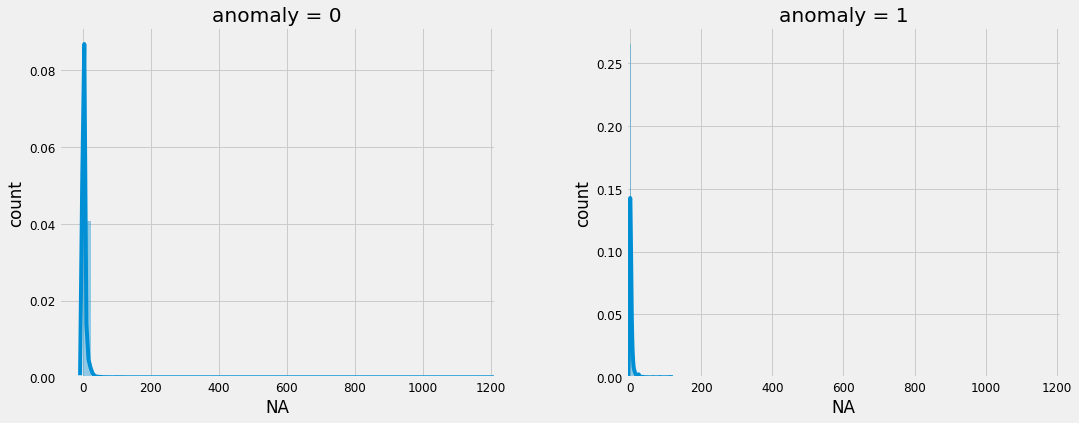

In [47]:
num_plot('NA')

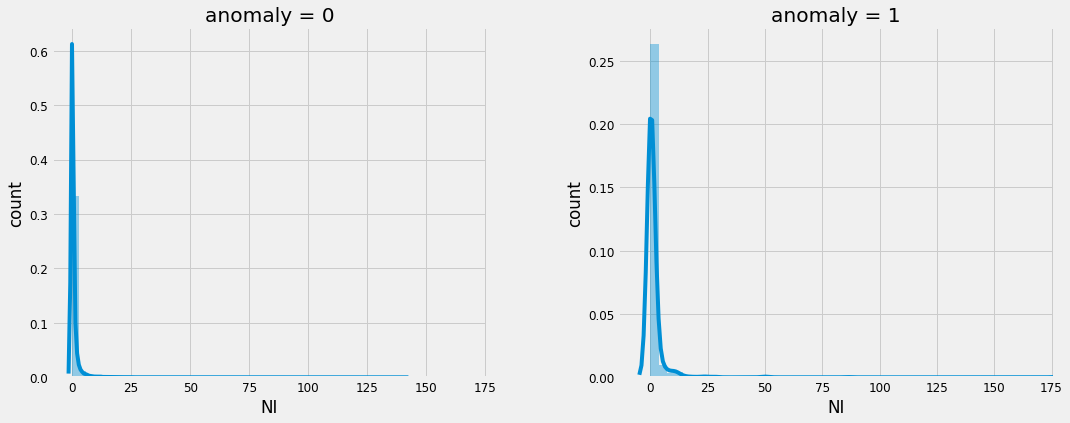

In [48]:
num_plot('NI') #Test Feature

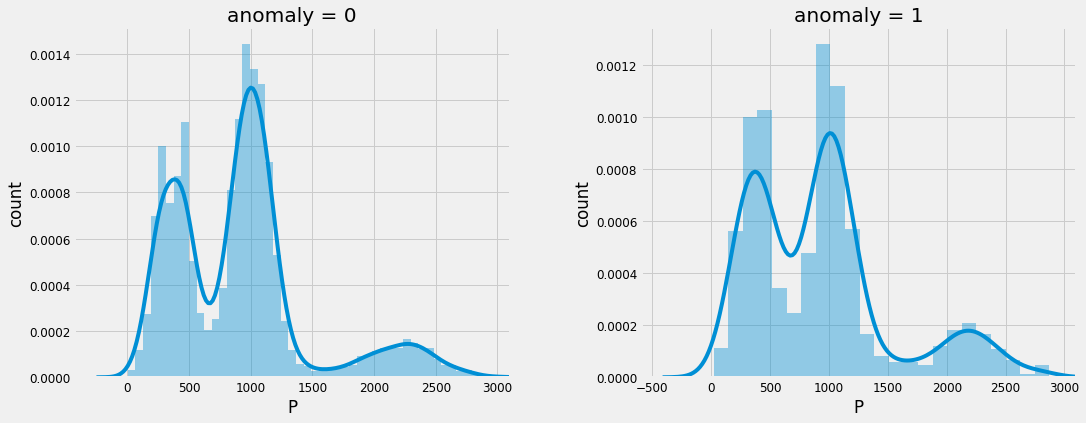

In [49]:
num_plot('P')

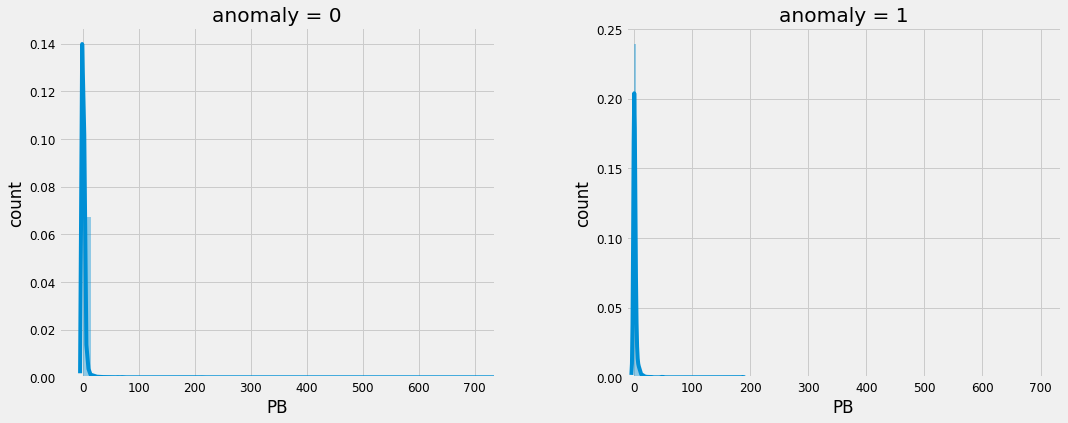

In [50]:
num_plot('PB')

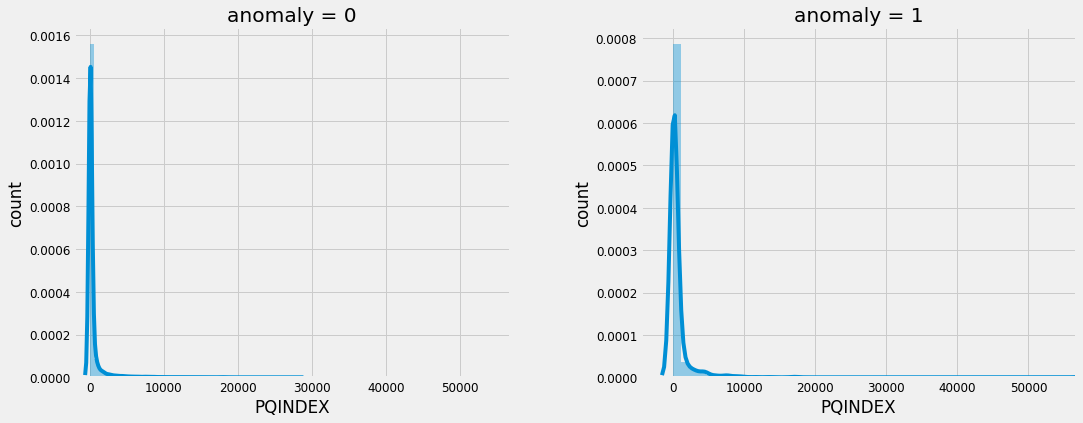

In [51]:
num_plot('PQINDEX') #Test Feature

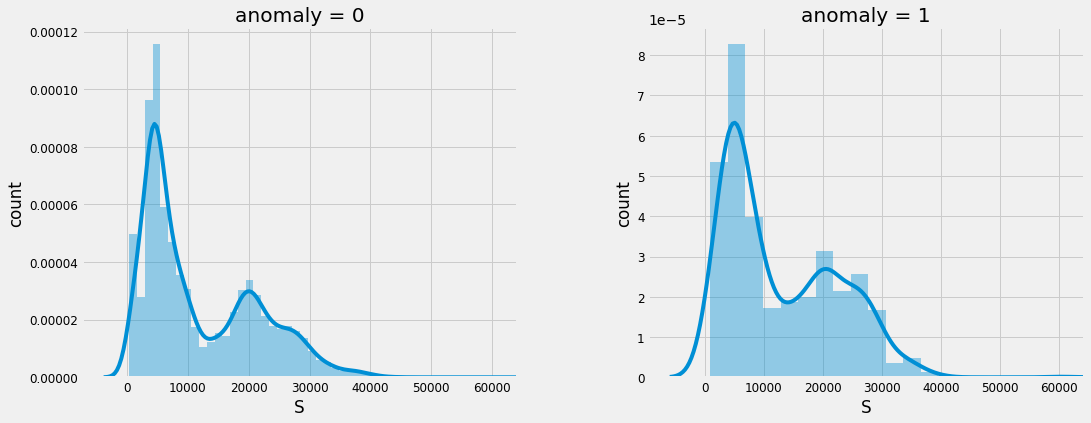

In [52]:
num_plot('S')

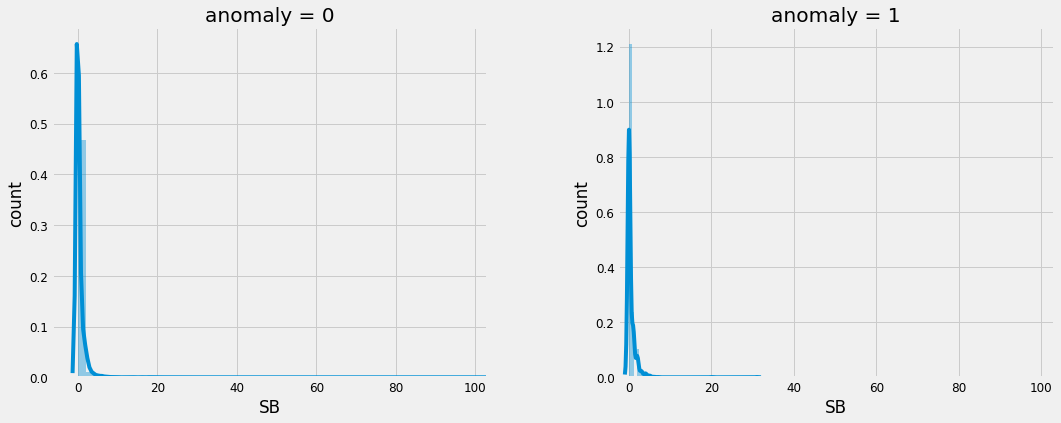

In [53]:
num_plot('SB')

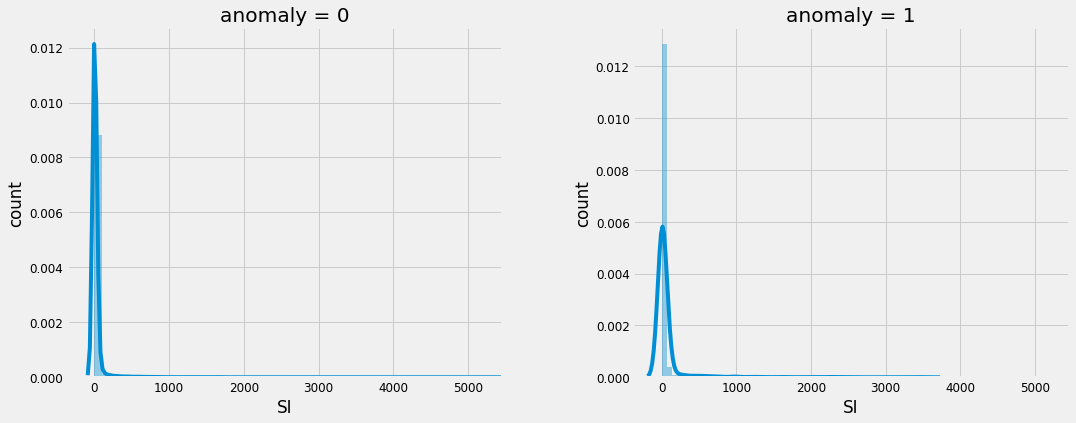

In [54]:
num_plot('SI')

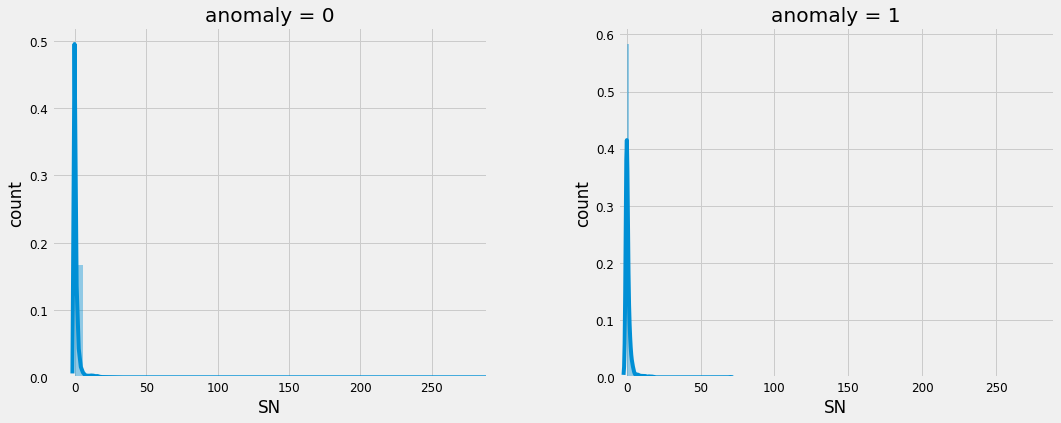

In [55]:
num_plot('SN')

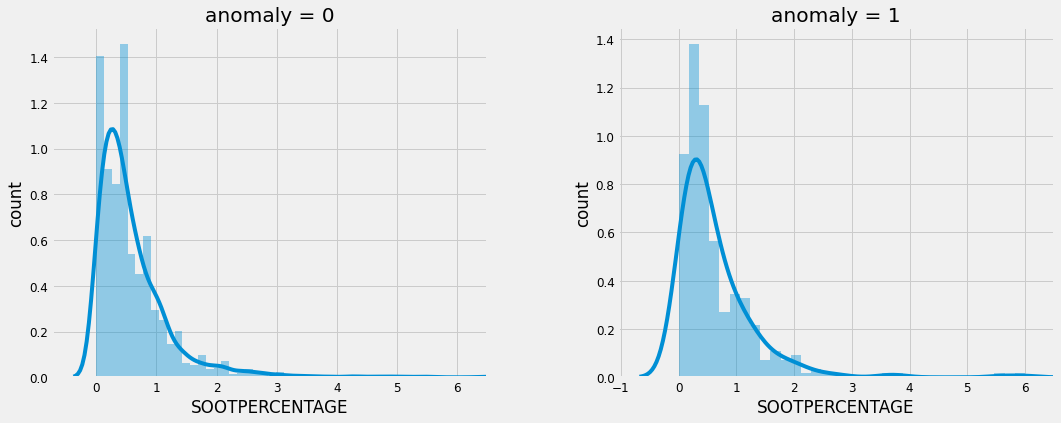

In [56]:
num_plot('SOOTPERCENTAGE')

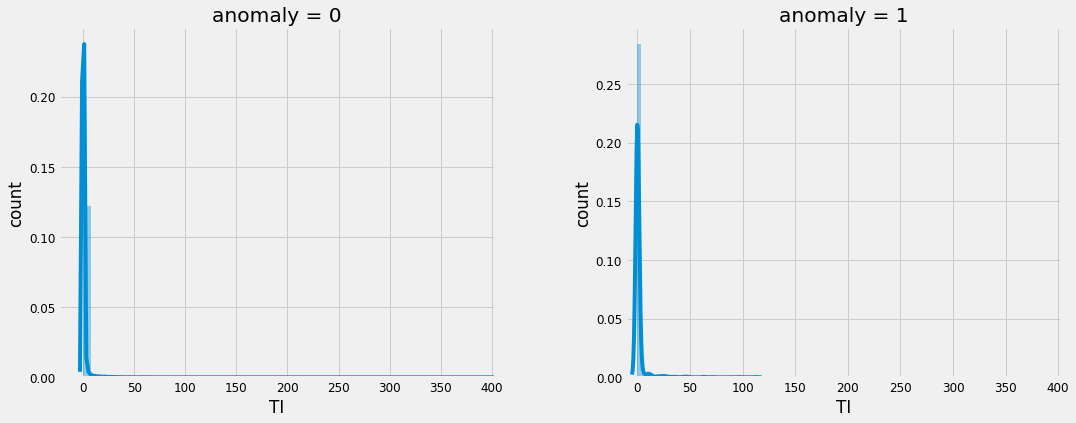

In [57]:
num_plot('TI') #Test Feature

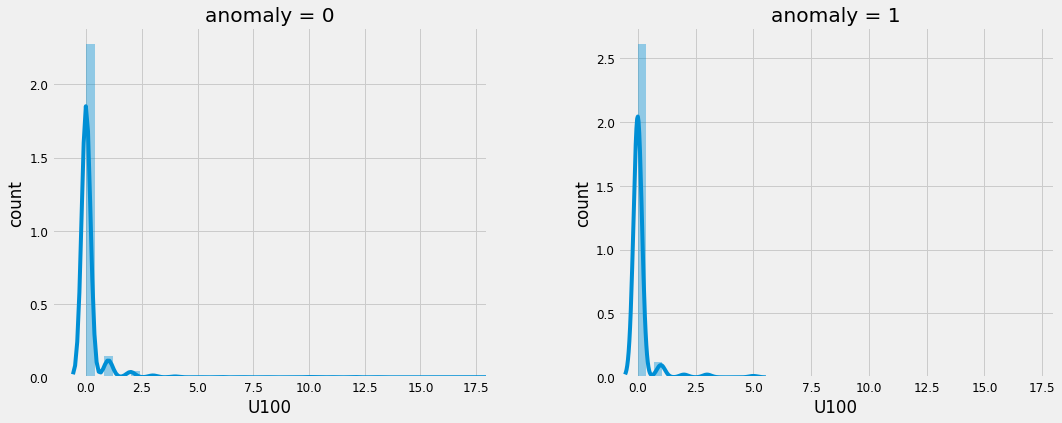

In [58]:
num_plot('U100')

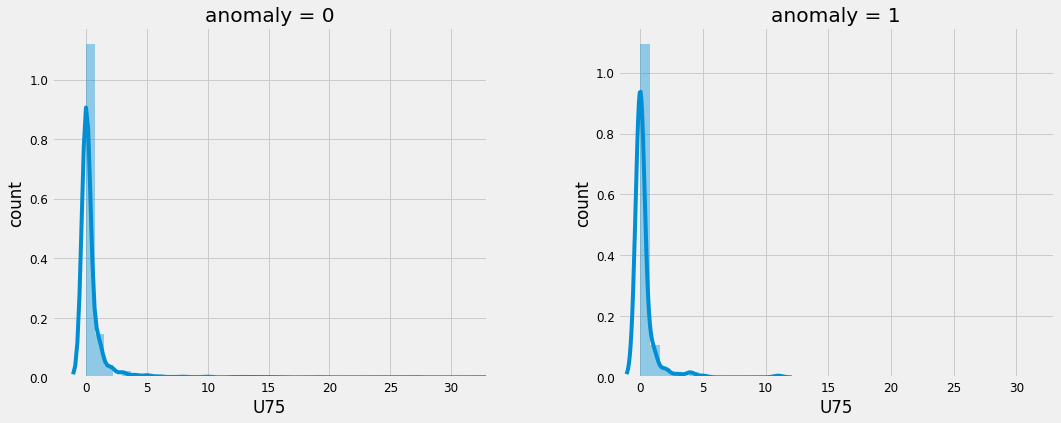

In [59]:
num_plot('U75')

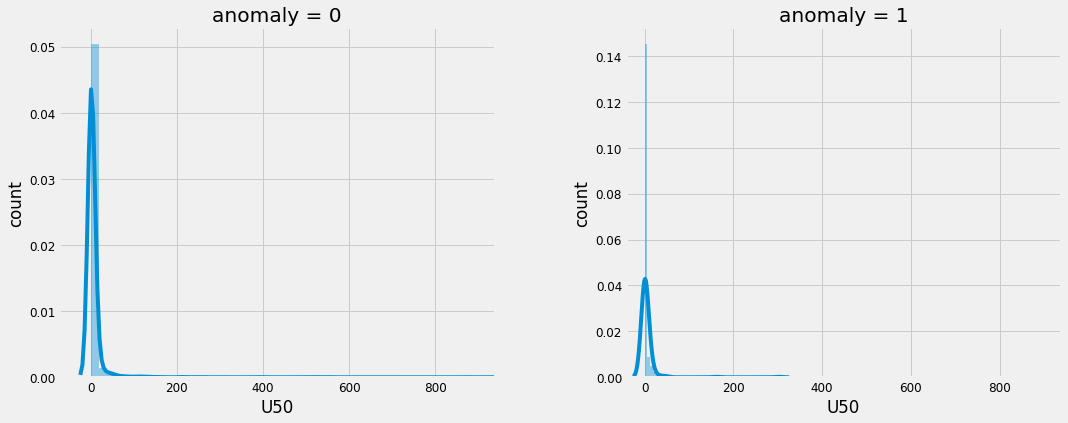

In [60]:
num_plot('U50')

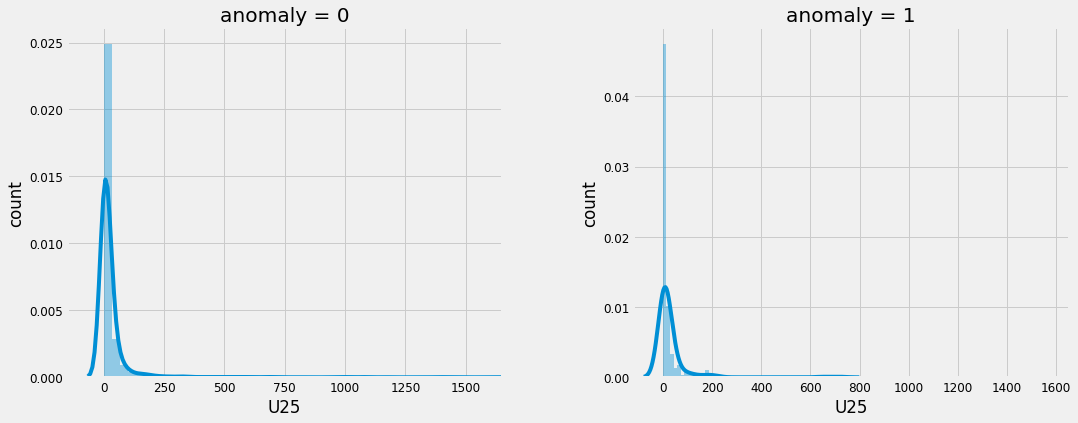

In [61]:
num_plot('U25')

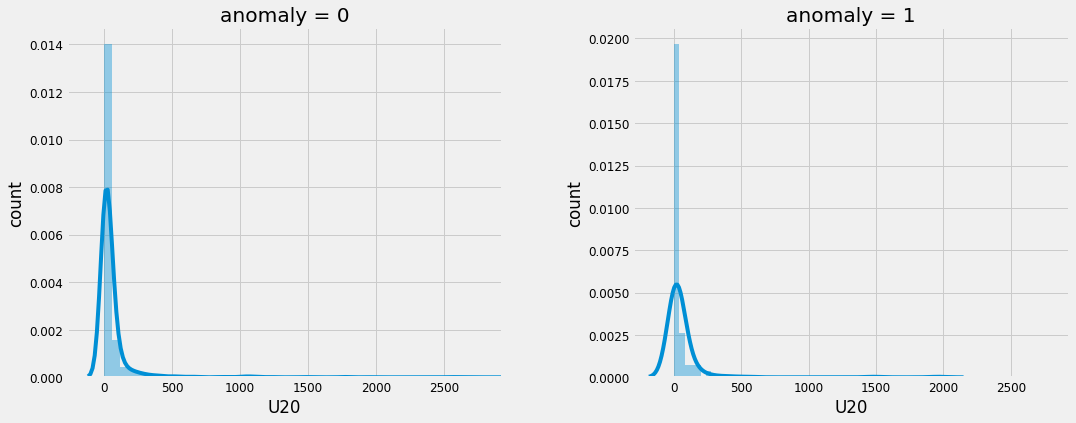

In [62]:
num_plot('U20')

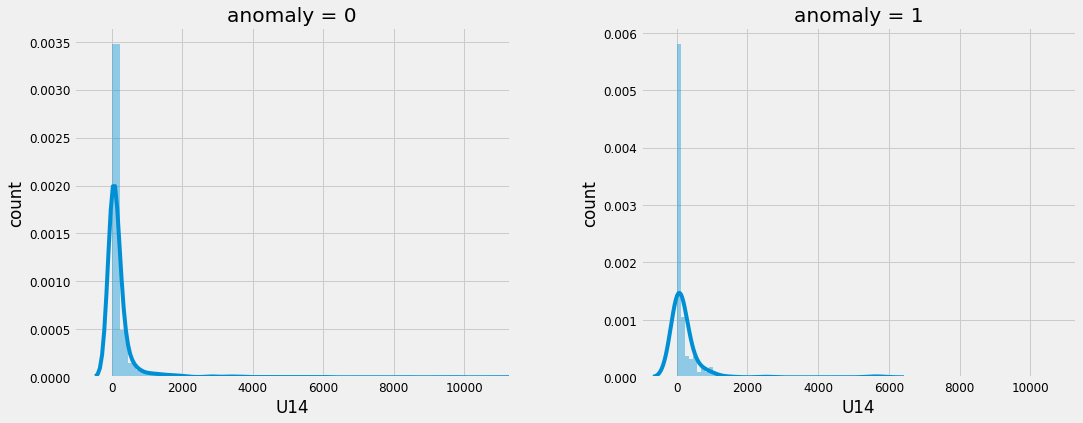

In [63]:
num_plot('U14')

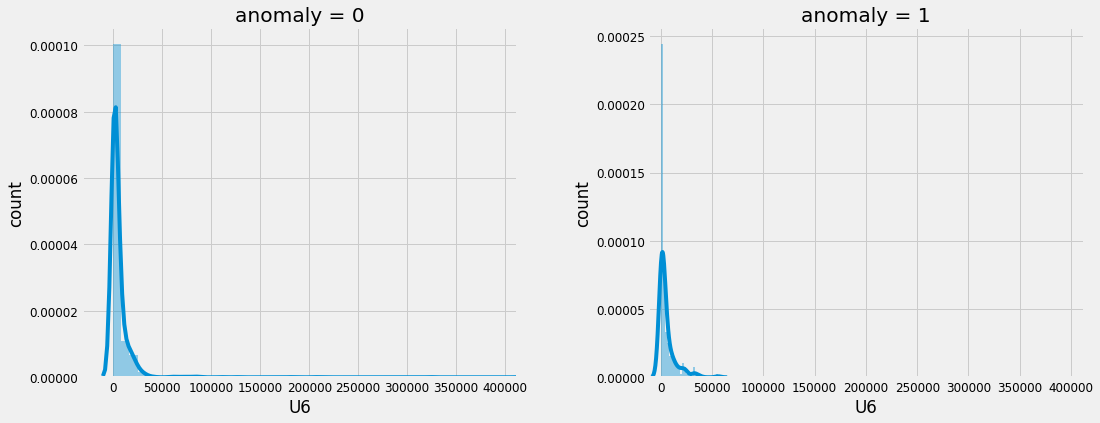

In [64]:
num_plot('U6')

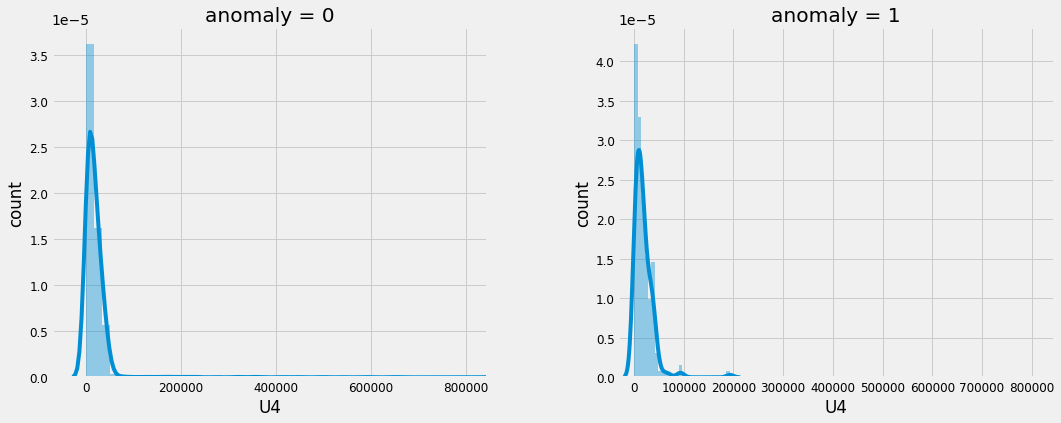

In [65]:
num_plot('U4')

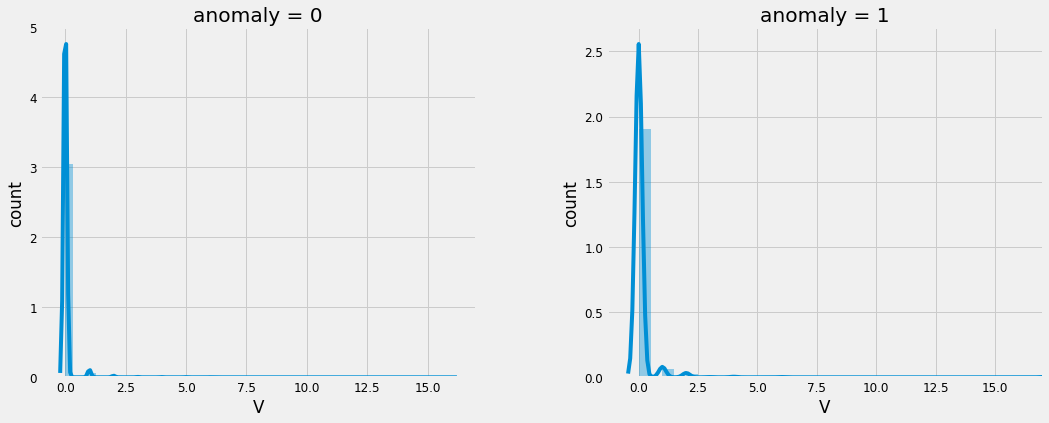

In [66]:
num_plot('V') #Test Feature

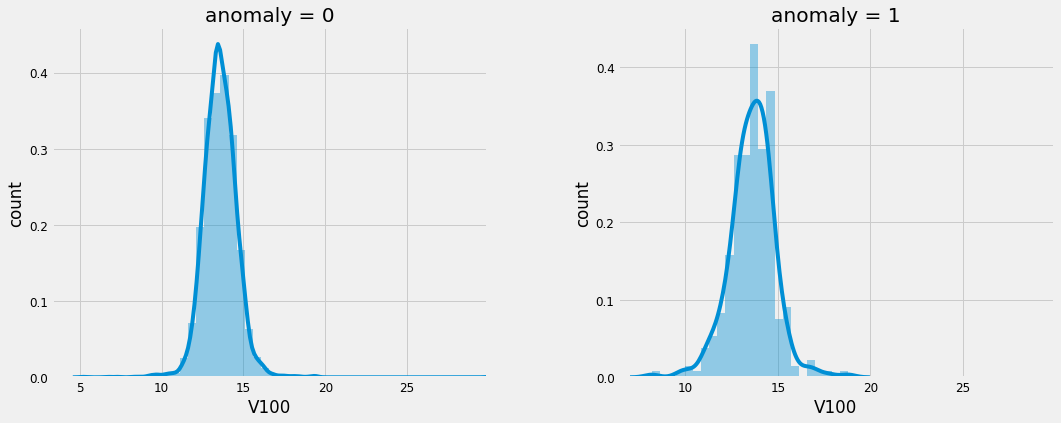

In [67]:
num_plot('V100')

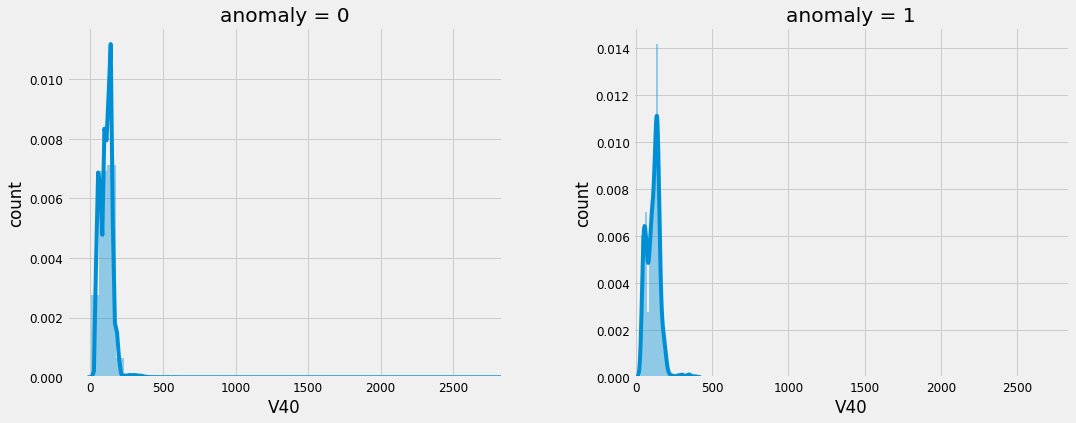

In [68]:
num_plot('V40') #Test Feature

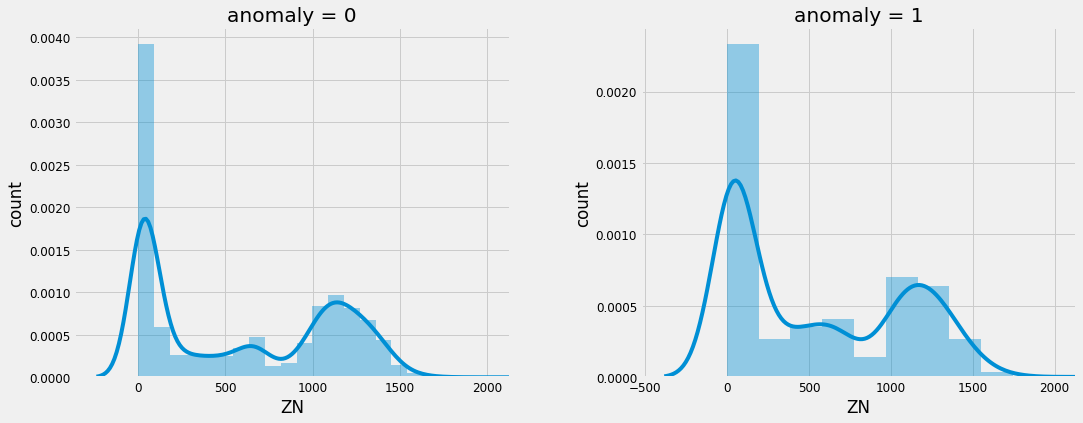

In [69]:
num_plot('ZN') #Test Feature

## 상관관계 시각화

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [71]:
train_corr = train.drop(columns=['ID', 'COMPONENT_ARBITRARY', 'YEAR', 'SAMPLE_TRANSFER_DAY','Y_LABEL'], axis=1)
scaler = RobustScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])

In [72]:
train_corr['Y_LABEL'] = train['Y_LABEL']
# Y_LABEL을 object형에서 int형으로 변환
train_corr = train_corr.astype({'Y_LABEL' : 'int'})
corr = train_corr.corr(method='pearson')

<AxesSubplot:>

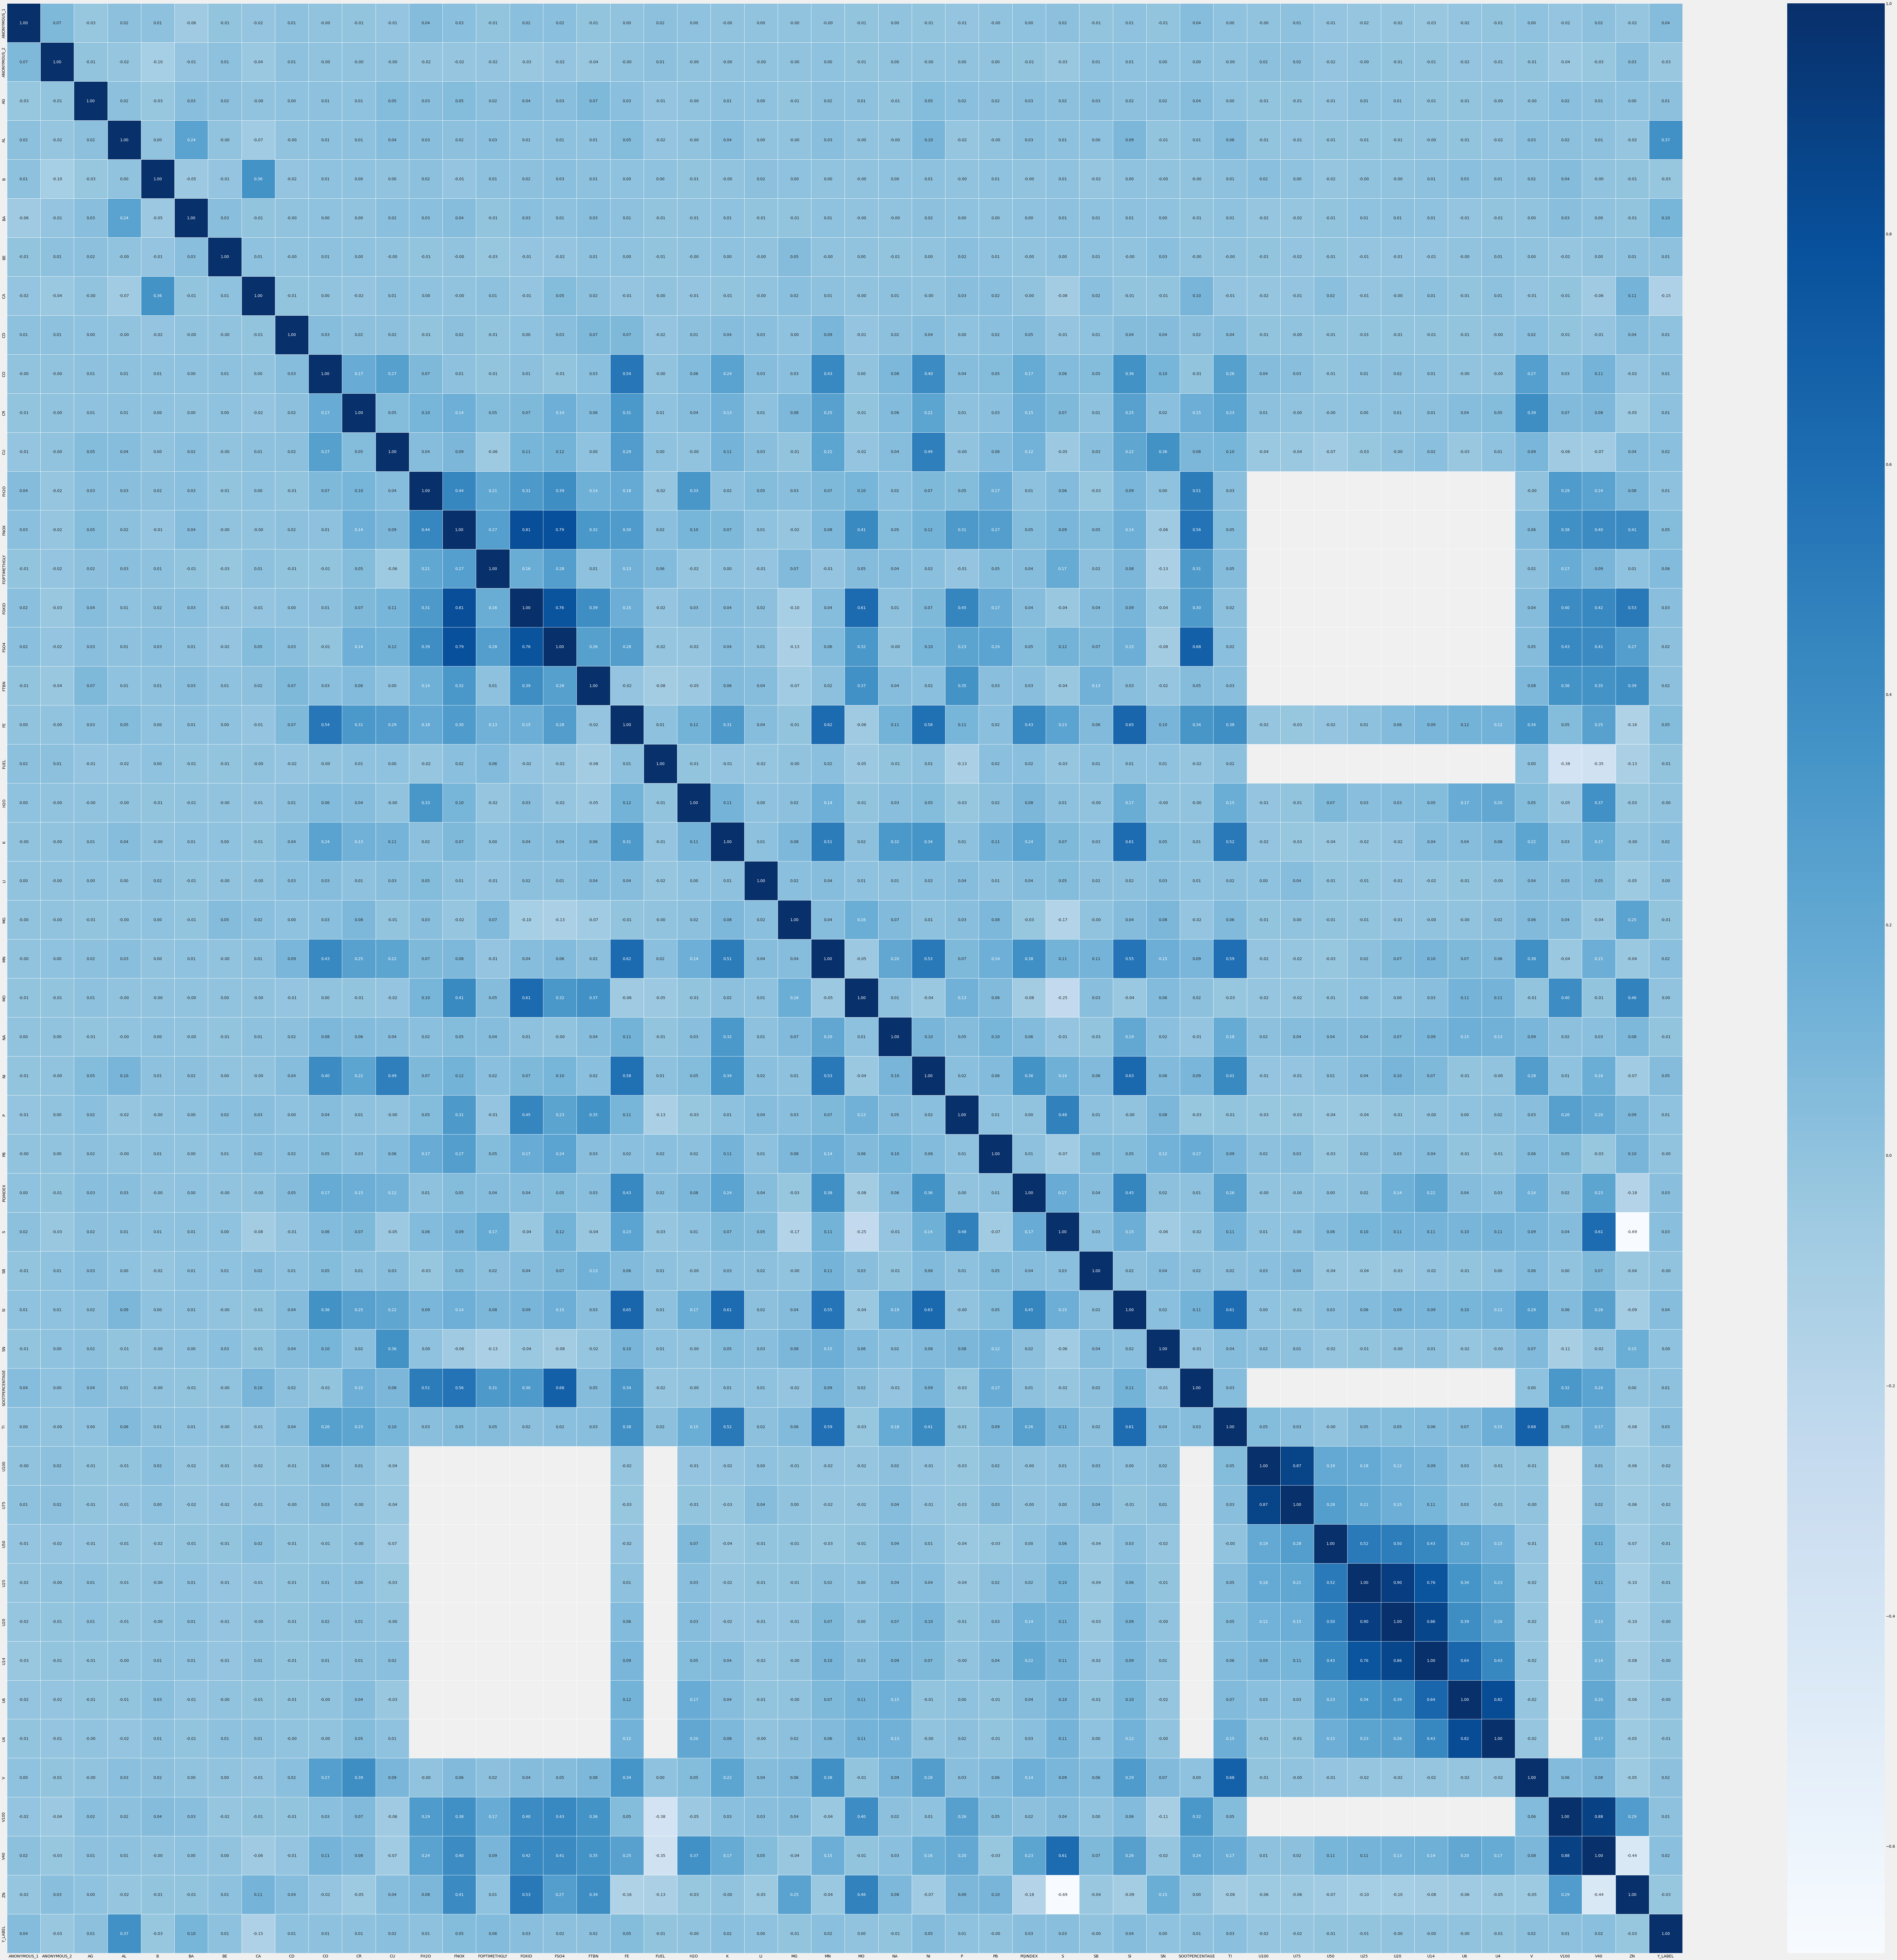

In [73]:
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [78]:
correlation = corr.unstack()
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
train_temp.style.background_gradient(cmap='viridis')

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FOPTIMETHGLY,0.055908
FNOX,0.053337
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
FOXID,0.032596
